In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
loan_records = pd.read_csv("loan_prediction_dataset.csv")
loan_records.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Loan_Approved
0,56,81788,334,15022,48,Employed,0
1,69,102879,781,21013,24,Self-Employed,1
2,46,58827,779,39687,60,Self-Employed,0
3,32,127188,364,16886,24,Unemployed,0
4,60,25655,307,26256,36,Unemployed,0


In [2]:
# Step 2: Clean column headers
loan_records.columns = loan_records.columns.str.strip()

# Step 3: Encode 'Employment_Status' using LabelEncoder
status_encoder = LabelEncoder()
loan_records['Employment_Status'] = status_encoder.fit_transform(loan_records['Employment_Status'])

In [3]:
# Step 4: Check and report missing values
missing_data = loan_records.isnull().sum()
print("Missing Values in Each Column:\n", missing_data)


Missing Values in Each Column:
 Age                  0
Income               0
Credit_Score         0
Loan_Amount          0
Loan_Term            0
Employment_Status    0
Loan_Approved        0
dtype: int64


In [4]:
# Step 5: Separate features and label
predictors = loan_records.drop(columns=['Loan_Approved'])
approval_outcome = loan_records['Loan_Approved']


In [5]:
# Step 6: Normalize input features
feature_scaler = StandardScaler()
normalized_features = feature_scaler.fit_transform(predictors)

In [6]:
# Step 7: Split into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    normalized_features, approval_outcome, test_size=0.2, random_state=42)

# Final check
print("Training Set Shape :", X_train_split.shape)
print("Testing Set Shape  :", X_test_split.shape)

Training Set Shape : (1600, 6)
Testing Set Shape  : (400, 6)


# EXPLORATORY DATA ANALYSIS

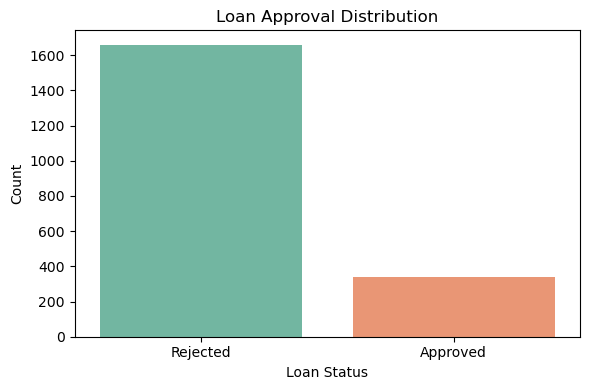

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Approved', data=loan_records, palette='Set2')
plt.title("Loan Approval Distribution")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


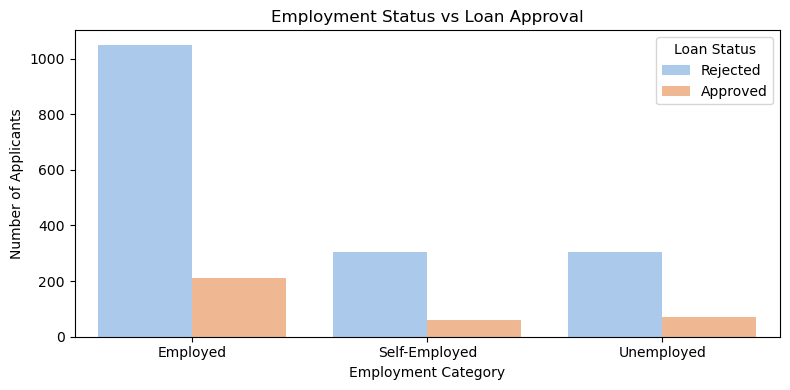

In [8]:
# employment labels
eda_data = loan_records.copy()
employment_labels = {0: "Employed", 1: "Self-Employed", 2: "Unemployed"}
eda_data['Employment_Status'] = eda_data['Employment_Status'].map(employment_labels)

plt.figure(figsize=(8, 4))
sns.countplot(x='Employment_Status', hue='Loan_Approved', data=eda_data, palette='pastel')
plt.title("Employment Status vs Loan Approval")
plt.xlabel("Employment Category")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Status", labels=["Rejected", "Approved"])
plt.tight_layout()
plt.show()


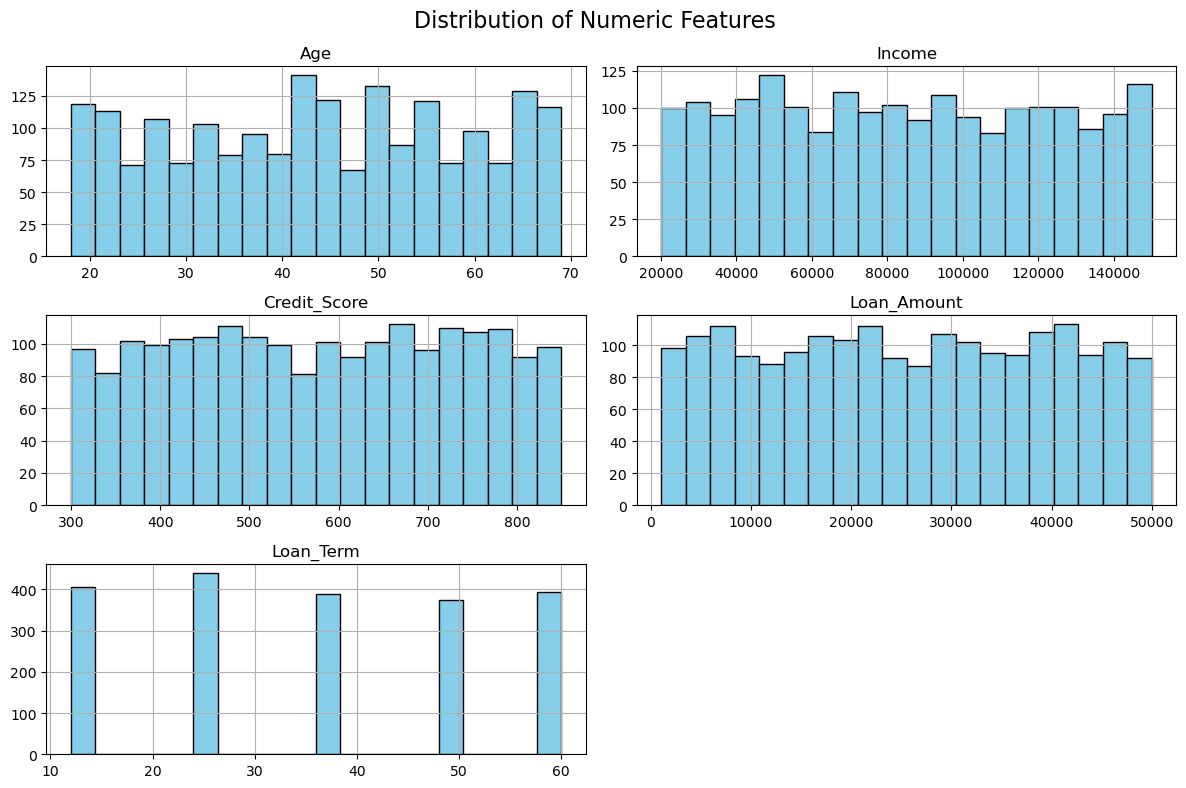

In [9]:
# Visualize distributions of numerical fields
numerical_fields = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term']
loan_records[numerical_fields].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


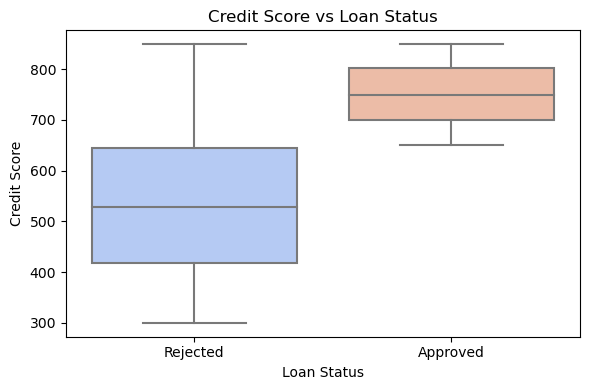

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Approved', y='Credit_Score', data=loan_records, palette='coolwarm')
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.tight_layout()
plt.show()


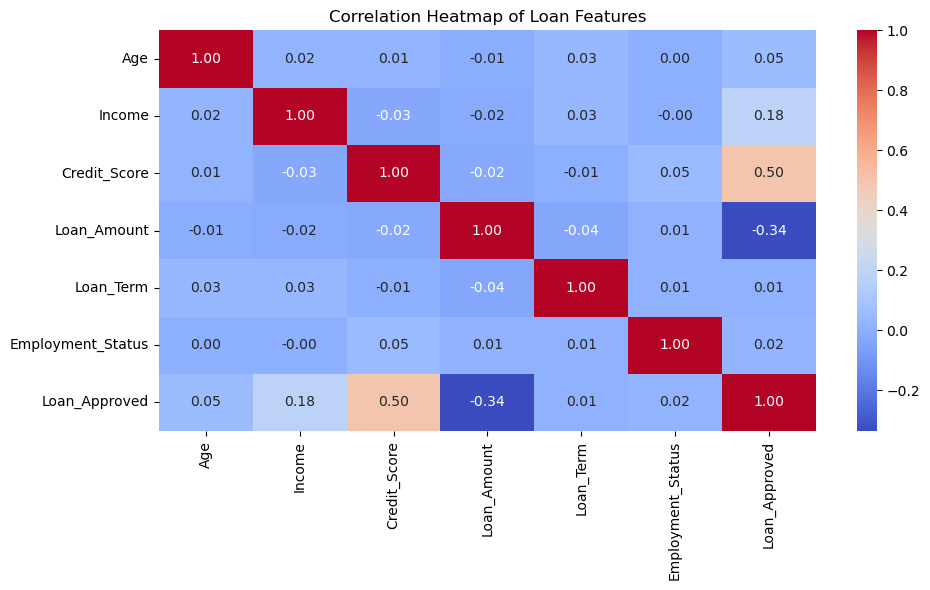

In [11]:
# Compute and visualize correlations
plt.figure(figsize=(10, 6))
correlation_map = loan_records.corr(numeric_only=True)
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Loan Features")
plt.tight_layout()
plt.show()


In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to your existing training data
sm = SMOTE()
X_train_split, y_train_split = sm.fit_resample(X_train_split, y_train_split)



In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(X_train_split, y_train_split)
svm_predictions = svm_model.predict(X_test_split)

print(" SVM Classifier Results")
print("Accuracy:", round(accuracy_score(y_test_split, svm_predictions) * 100, 2), "%")
print("Classification Report:\n", classification_report(y_test_split, svm_predictions))


 SVM Classifier Results
Accuracy: 96.5 %
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       322
           1       0.87      0.96      0.91        78

    accuracy                           0.96       400
   macro avg       0.93      0.96      0.95       400
weighted avg       0.97      0.96      0.97       400



In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train_split, y_train_split)
tree_predictions = tree_model.predict(X_test_split)

print(" Decision Tree Results")
print("Accuracy:", round(accuracy_score(y_test_split, tree_predictions) * 100, 2), "%")
print("Classification Report:\n", classification_report(y_test_split, tree_predictions))


 Decision Tree Results
Accuracy: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00        78

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(class_weight='balanced')
forest_model.fit(X_train_split, y_train_split)
forest_predictions = forest_model.predict(X_test_split)

print(" Random Forest Results")
print("Accuracy:", round(accuracy_score(y_test_split, forest_predictions) * 100, 2), "%")
print("Classification Report:\n", classification_report(y_test_split, forest_predictions))


 Random Forest Results
Accuracy: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00        78

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Print evaluation reports
print(" SVM Evaluation")
print("Accuracy:", round(accuracy_score(y_test_split, svm_predictions) * 100, 2), "%")
print(classification_report(y_test_split, svm_predictions))

print(" Decision Tree Evaluation")
print("Accuracy:", round(accuracy_score(y_test_split, tree_predictions) * 100, 2), "%")
print(classification_report(y_test_split, tree_predictions))

print(" Random Forest Evaluation")
print("Accuracy:", round(accuracy_score(y_test_split, forest_predictions) * 100, 2), "%")
print(classification_report(y_test_split, forest_predictions))


 SVM Evaluation
Accuracy: 96.5 %
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       322
           1       0.87      0.96      0.91        78

    accuracy                           0.96       400
   macro avg       0.93      0.96      0.95       400
weighted avg       0.97      0.96      0.97       400

 Decision Tree Evaluation
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00        78

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

 Random Forest Evaluation
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00        78

    accuracy                           1.00       400
   macr

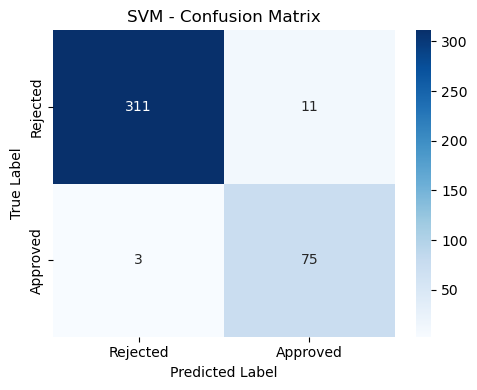

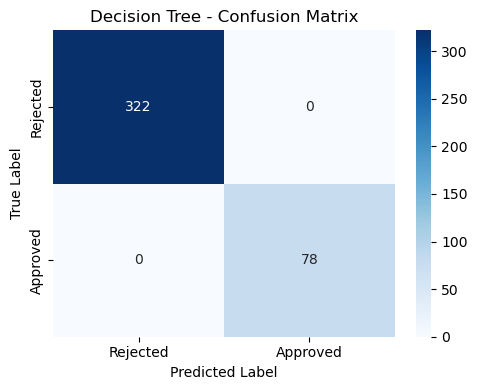

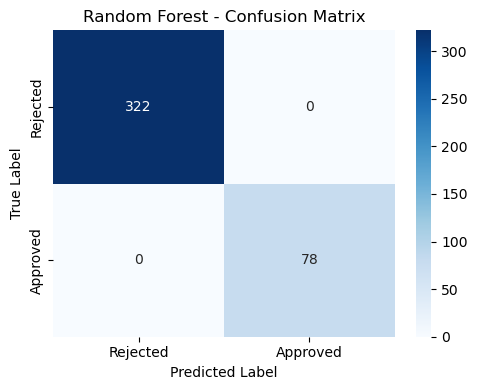

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_conf_matrix(y_test_split, svm_predictions, "SVM")
plot_conf_matrix(y_test_split, tree_predictions, "Decision Tree")
plot_conf_matrix(y_test_split, forest_predictions, "Random Forest")


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import reciprocal

# Define hyperparameter search space
param_dist = {
    'C': reciprocal(0.1, 50),
    'gamma': reciprocal(0.001, 1)
}

# Initialize the SVM model with class_weight fixed
svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

# Perform randomized search with macro F1 scoring
svm_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model using the training set
svm_search.fit(X_train_split, y_train_split)

# Get the best model from search
best_svm = svm_search.best_estimator_

# Predict on the test set
svm_predictions = best_svm.predict(X_test_split)

# Evaluate the model
print("Tuned SVM (Balanced) - Best Parameters:", svm_search.best_params_)
print("Accuracy:", round(accuracy_score(y_test_split, svm_predictions) * 100, 2), "%")
print("Classification Report:\n", classification_report(y_test_split, svm_predictions))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuned SVM (Balanced) - Best Parameters: {'C': 40.38423798071558, 'gamma': 0.2661901888489056}
Accuracy: 97.5 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       322
           1       0.97      0.90      0.93        78

    accuracy                           0.97       400
   macro avg       0.97      0.95      0.96       400
weighted avg       0.97      0.97      0.97       400



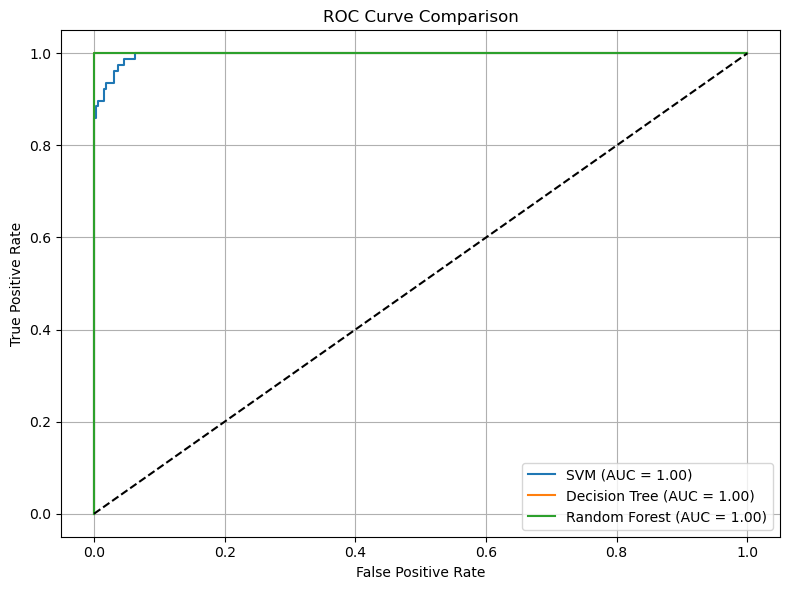

In [19]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Refit models (to avoid NotFittedError)
svm_model_prob = SVC(kernel='rbf', class_weight='balanced', probability=True)
tree_model = DecisionTreeClassifier(class_weight='balanced')
forest_model = RandomForestClassifier(class_weight='balanced')

svm_model_prob.fit(X_train_split, y_train_split)
tree_model.fit(X_train_split, y_train_split)
forest_model.fit(X_train_split, y_train_split)

# Predict probabilities
svm_probs = svm_model_prob.predict_proba(X_test_split)[:, 1]
tree_probs = tree_model.predict_proba(X_test_split)[:, 1]
forest_probs = forest_model.predict_proba(X_test_split)[:, 1]

# Calculate ROC curves and AUC scores
fpr_svm, tpr_svm, _ = roc_curve(y_test_split, svm_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test_split, tree_probs)
fpr_forest, tpr_forest, _ = roc_curve(y_test_split, forest_probs)

auc_svm = auc(fpr_svm, tpr_svm)
auc_tree = auc(fpr_tree, tpr_tree)
auc_forest = auc(fpr_forest, tpr_forest)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


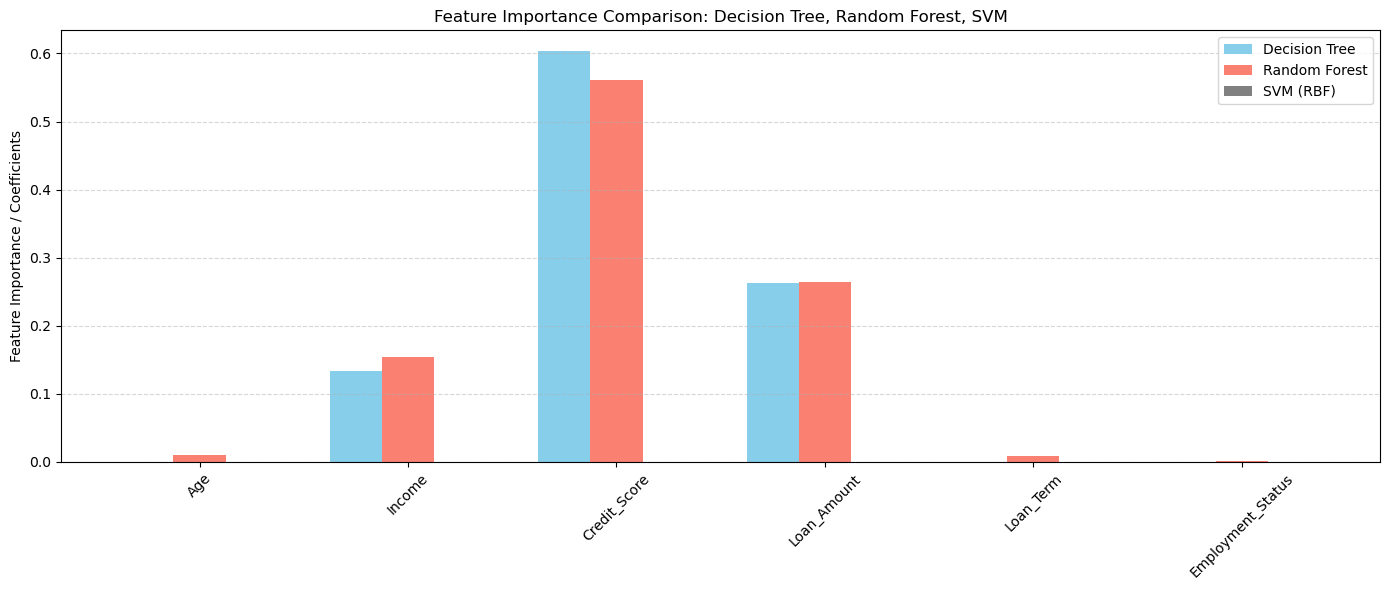

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Extract feature importances
tree_importances = tree_model.feature_importances_
forest_importances = forest_model.feature_importances_

# Step 2: Prepare SVM importances if linear, else fill with zeros
try:
    svm_importances = np.abs(svm_model.coef_[0])
except:
    svm_importances = np.zeros_like(tree_importances)  # SVM RBF has no feature importance

# Step 3: Build DataFrame
feature_names = predictors.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': tree_importances,
    'Random Forest': forest_importances,
    'SVM (RBF Kernel)': svm_importances
})

# Step 4: Plot grouped bar chart
x = np.arange(len(feature_names))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, importance_df['Decision Tree'], width, label='Decision Tree', color='skyblue')
plt.bar(x, importance_df['Random Forest'], width, label='Random Forest', color='salmon')
plt.bar(x + width, importance_df['SVM (RBF Kernel)'], width, label='SVM (RBF)', color='gray')

plt.xticks(x, importance_df['Feature'], rotation=45)
plt.ylabel("Feature Importance / Coefficients")
plt.title("Feature Importance Comparison: Decision Tree, Random Forest, SVM")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [21]:
import joblib

# Save each trained model
joblib.dump(forest_model, 'forest_model.pkl')
joblib.dump(tree_model, 'tree_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

print("All models saved successfully.")


All models saved successfully.


In [22]:
# Load saved models
forest_model = joblib.load('forest_model.pkl')
tree_model = joblib.load('tree_model.pkl')
svm_model = joblib.load('svm_model.pkl')


In [24]:
import pandas as pd

# Sample input (replace values as needed)
sample_input = pd.DataFrame([{
    'Gender': 'Male',
    'Age': 35,
    'Income': 55000,
    'Loan_Amount': 15000,
    'Loan_Term': 36,
    'Credit_Score': 720,
    'Employment_Status': 'Employed'
}])

# Step 1: Encode 'Employment_Status'
sample_input['Employment_Status'] = status_encoder.transform(sample_input['Employment_Status'])

# Step 2: Match training feature order
sample_input = sample_input[predictors.columns]

# Step 3: Scale the input
scaled_input = feature_scaler.transform(sample_input)

# Step 4: Predict using models
print("Random Forest:", forest_model.predict(scaled_input)[0])
print("Decision Tree:", tree_model.predict(scaled_input)[0])



Random Forest: 1
Decision Tree: 1
